In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [2]:
# Dataset info
with open("../flag.names") as file:
    for line in file:
        print(line)

1. TItle: Flag database



2. Source Information

   -- Creators: Collected primarily from the "Collins Gem Guide to Flags":

      Collins Publishers (1986).

   -- Donor: Richard S. Forsyth 

             8 Grosvenor Avenue

             Mapperley Park

             Nottingham NG3 5DX

             0602-621676

   -- Date: 5/15/1990



3. Past Usage:

   -- None known other than what is shown in Forsyth's PC/BEAGLE User's Guide.



4. Relevant Information:

   -- This data file contains details of various nations and their flags.

      In this file the fields are separated by spaces (not commas).  With

      this data you can try things like predicting the religion of a country

      from its size and the colours in its flag.  

   -- 10 attributes are numeric-valued.  The remainder are either Boolean-

      or nominal-valued.



5. Number of Instances: 194



6. Number of attributes: 30 (overall)



7. Attribute Information:

   1. name	Name of the country concerned

   2. landm

In [3]:
df = pd.read_csv("../flag.data")
df

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Western-Samoa,6,3,3,0,1,1,0,0,3,...,0,1,5,0,0,0,0,0,blue,red
190,Yugoslavia,3,1,256,22,6,6,0,3,4,...,0,0,1,0,0,0,0,0,blue,red
191,Zaire,4,2,905,28,10,5,0,0,4,...,0,0,0,0,0,1,1,0,green,green
192,Zambia,4,2,753,6,10,5,3,0,4,...,0,0,0,0,0,0,1,0,green,brown


In [4]:
# replacing color names with ints
df = df.replace({"red": 0,"blue":1,"white":2,"green":3,"black":4,"gold":5,"orange":6, "brown":7, "gold":8})

In [5]:
# separate names of countries and it's flags info
y = df.name
X = df

# deleting extra info about countries, that does not applies to flags
X.drop(columns=['name','landmass','zone','area','population','language','religion'], axis=1, inplace=True)
X.head()

,bars,stripes,colours,red,green,blue,gold,white,black,orange,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,0,3,5,1,1,0,1,1,1,0,...,0,0,1,0,0,1,0,0,4,3
1,0,0,3,1,0,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0
2,2,0,3,1,1,0,0,1,0,0,...,0,0,1,1,0,0,0,0,3,2
3,0,0,5,1,0,1,1,1,0,1,...,0,0,0,0,1,1,1,0,1,0
4,3,0,3,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


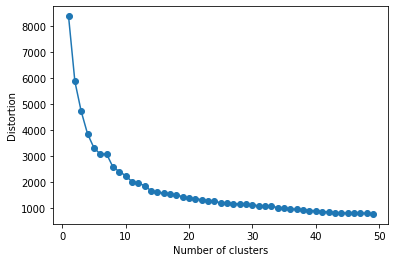

In [6]:
# Elbow method to find better number of clusters
distortions = []
n = 50
for i in range(1, 50):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 50), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [7]:
# the elbow is located at number of clusters = 10,
# which is evidence that number of clusters = 10 is indeed a good choice for this dataset

In [8]:
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=0,init='random',
    n_init=10, max_iter=300, 
    tol=1e-04).fit(X)

In [9]:
kmeans.labels_

array([3, 0, 2, 7, 1, 4, 2, 7, 8, 8, 0, 8, 8, 0, 2, 0, 1, 7, 2, 7, 3, 4,
       8, 6, 7, 5, 7, 4, 6, 0, 5, 0, 1, 7, 5, 1, 0, 0, 3, 2, 0, 6, 8, 8,
       2, 0, 0, 2, 6, 0, 3, 4, 8, 3, 3, 2, 7, 7, 2, 0, 0, 8, 3, 8, 5, 5,
       4, 0, 8, 0, 1, 7, 0, 1, 1, 2, 2, 0, 7, 4, 0, 3, 4, 8, 4, 2, 0, 2,
       2, 5, 2, 3, 0, 8, 0, 3, 8, 0, 2, 8, 2, 0, 8, 4, 4, 8, 0, 1, 0, 0,
       2, 4, 2, 0, 4, 0, 7, 0, 5, 8, 1, 8, 0, 0, 8, 3, 2, 5, 8, 4, 0, 4,
       2, 0, 2, 7, 0, 0, 0, 7, 8, 5, 7, 4, 0, 2, 2, 2, 4, 3, 0, 2, 0, 3,
       2, 4, 8, 5, 7, 2, 0, 2, 4, 8, 8, 0, 0, 4, 0, 2, 8, 8, 0, 0, 0, 0,
       7, 6, 4, 3, 0, 8, 7, 9, 0, 2, 3, 6, 0, 0, 8, 2, 5, 8], dtype=int32)

In [10]:
for i in range(n_clusters):
    print(f"{i}-cluster:\n")
    for j in range(len(kmeans.labels_)):
        if kmeans.labels_[j] == i:
            print(y[j])
    print("\n")    

0-cluster:

Albania
Australia
Bahrain
Barbados
Burundi
Canada
Chile
China
Congo
Czechoslovakia
Denmark
Dominican-Republic
France
French-Guiana
Gibraltar
Greenland
Guatemala
Honduras
Iceland
Israel
Kampuchea
Kiribati
Lebanon
Liechtenstein
Maldive-Islands
Malta
Marianas
Micronesia
Mongolia
Morocco
Netherlands-Antilles
New-Zealand
Norway
Panama
Peru
Philippines
Poland
San-Marino
Singapore
Somalia
St-Lucia
Sweden
Switzerland
Taiwan
Tonga
Trinidad-Tobago
Tunisia
Turkey
UK
USSR
Vietnam
Western-Samoa


1-cluster:

Andorra
Belgium
Cape-Verde-Islands
Chad
Grenada
Guinea
Guinea-Bissau
Mali
Nepal


2-cluster:

Algeria
Anguilla
Bangladesh
Benin
Comorro-Islands
Cyprus
Djibouti
Faeroes
Finland
Guyana
Haiti
Ireland
Italy
Ivory-Coast
Japan
Lesotho
Libya
Mauritania
Mexico
Nigeria
Pakistan
Papua-New-Guinea
Sao-Tome
Saudi-Arabia
Senegal
Soloman-Islands
South-Korea
St-Kitts-Nevis
St-Vincent
Tanzania
Vanuatu
Zaire


3-cluster:

Afghanistan
Bhutan
Colombia
Ecuador
Equatorial-Guinea
Ethiopia
Gabon
India
Jord